
1. 소비 우수고객 찾기
2. 고객 재구매율 분석

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('/content/drive/MyDrive/미니프로젝트/쇼핑몰 주문 데이터를 활용한 데이터분석 Project/Data/OnlineRetailClean.csv', dtype=dtypes)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### 우수 고객 확인
 - 구매 횟수 기준
 - 지불 금액 기준

In [6]:
#구매 횟수 기준
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [8]:
#지불 금액 기준
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

#### 고객 cohort 분석
- 같은 기간 동안 비슷한 경험을 한 고객의 집단 분석


#### 사용자 retention 분석
 - 월간 사용자 cohort를 바탕으로 월별 재구매율(retention) 분석하기
 - heatmap으로 한눈에 재구매율을 파악 가능
   -![코호트 분석](https://analyticsmarketing.co.kr/wp-content/uploads/2017/08/%EA%B5%AC%EA%B8%80%EC%95%A0%EB%84%90%EB%A6%AC%ED%8B%B1%EC%8A%A4_%EC%BD%94%ED%98%B8%ED%8A%B8_01.png)  https://analyticsmarketing.co.kr/digital-analytics/google-analytics/1527/
   

#### 사용자 기준으로 최초 구매한 월(month) 연산하기
 - Month : 구매 월
 - MonthStarted: 사용자가 최초 구매한 달

In [10]:
def get_month(date):
  return datetime(date.year,date.month,1)

retail['Month']=retail['InvoiceDate'].apply(get_month)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [11]:
month_group=retail.groupby('CustomerID')['Month']
retail['MonthStarted']=month_group.transform(np.min) #최초구매= 구매날짜 중 min값
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01


In [12]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


#### 각 구매가 최초 구매로 부터 얼마의 월이 지났는지 연산
 - MonthPassed : 최초 구매월로부터의 월 차이

In [13]:
retail['Month'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
397879    2011
397880    2011
397881    2011
397882    2011
397883    2011
Name: Month, Length: 397884, dtype: int64

In [14]:
retail['MonthPassed']=(retail['Month'].dt.year - retail['MonthStarted'].dt.year)*12 + \
          (retail['Month'].dt.month - retail['MonthStarted'].dt.month)

In [16]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


#### 기준 월(monthstarted 최초 구매 월), MonthPassed를 기준으로 고객 카운팅
 - 기준이 되는 월과 그 월로부터 지난 기간의 고객 수를 계산

In [19]:
def get_unique(x):
  return len(np.unique(x))

cohort_group=retail.groupby(['MonthStarted','MonthPassed'])
cohort_df=cohort_group['CustomerID'].apply(get_unique).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


#### 테이블 피벗
 - pivot 함수를 이용하여 index는 MonthStarted, columns을 MonthPassed로 변경하여 테이블 변경
 - 첫번째 column을 기준으로 100분위 연산

In [20]:
cohort_df=cohort_df.pivot(index='MonthStarted',columns='MonthPassed')
cohort_df.head()

CustomerID                       ...                            
MonthPassed          0      1      2      3   ...     9      10     11     12
MonthStarted                                  ...                            
2010-12-01        885.0  324.0  286.0  340.0  ...  350.0  331.0  445.0  235.0
2011-01-01        417.0   92.0  111.0   96.0  ...  136.0  152.0   49.0    NaN
2011-02-01        380.0   71.0   71.0  108.0  ...  116.0   26.0    NaN    NaN
2011-03-01        452.0   68.0  114.0   90.0  ...   39.0    NaN    NaN    NaN
2011-04-01        300.0   64.0   61.0   63.0  ...    NaN    NaN    NaN    NaN

[5 rows x 13 columns]

In [22]:
customer_cohort=cohort_df.div(cohort_df.iloc[:,0],axis=0)*100
customer_cohort=customer_cohort.round(decimals=2)

customer_cohort

CustomerID                       ...                            
MonthPassed          0      1      2      3   ...     9      10     11     12
MonthStarted                                  ...                            
2010-12-01        100.0  36.61  32.32  38.42  ...  39.55  37.40  50.28  26.55
2011-01-01        100.0  22.06  26.62  23.02  ...  32.61  36.45  11.75    NaN
2011-02-01        100.0  18.68  18.68  28.42  ...  30.53   6.84    NaN    NaN
2011-03-01        100.0  15.04  25.22  19.91  ...   8.63    NaN    NaN    NaN
2011-04-01        100.0  21.33  20.33  21.00  ...    NaN    NaN    NaN    NaN
2011-05-01        100.0  19.01  17.25  17.25  ...    NaN    NaN    NaN    NaN
2011-06-01        100.0  17.36  15.70  26.45  ...    NaN    NaN    NaN    NaN
2011-07-01        100.0  18.09  20.74  22.34  ...    NaN    NaN    NaN    NaN
2011-08-01        100.0  20.71  24.85  24.26  ...    NaN    NaN    NaN    NaN
2011-09-01        100.0  23.41  30.10  11.37  ...    NaN    NaN    NaN    NaN
2011-10-01        100.0  24.02  11.45    NaN  ...    NaN    NaN    NaN    NaN
2011-11-01        100.0  11.15    NaN    NaN  ...    NaN    NaN    NaN    NaN
2011-12-01        100.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN

[13 rows x 13 columns]

#### heatmap 출력하기


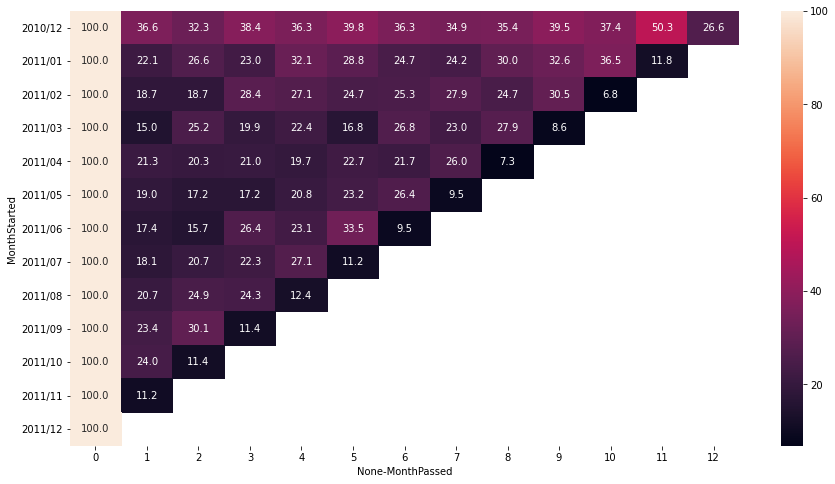

In [23]:
xticks = np.arange(0, 13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']

plt.figure(figsize = (15, 8))
sns.heatmap(customer_cohort, 
            annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.1f')
